In [1]:
# import

from Modeles import Modele
from Algos import Kl_ucb, Random, Offline

In [103]:
# creation d'un bandit 

MAXTETA = 20
n = 15 #15
k = 3 #3
lam = [(k-i+1)/(2*k+1) for i in range(k)]
teta = [i/n*MAXTETA  for i in range(n)] # utility des bras
W = [x/MAXTETA for x in teta] # attirance des bras
G = [g for g in teta] # gain des bras

b = Modele(n, k, lam, teta, W, G)

In [3]:
# charger un algo
algoKl = Kl_ucb()
algoKl.run(b, 1000)

In [4]:
algoRdm = Random()
algoRdm.run(b, 1000)

In [5]:
algoOff = Offline()
algoOff.run(b, 1000)

In [6]:
def Ymoy(G):
    X = [i  for i in range(len(G))]
    Y = [G[0] for _ in X]
    for i in range(1, len(G)):
        Y[i] = (i*Y[i-1] + G[i])/(i+1)
    return Y

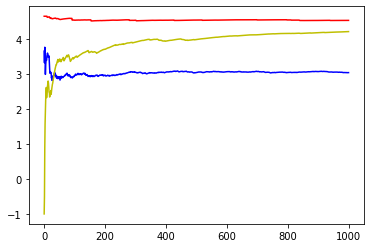

In [15]:
import matplotlib.pyplot as plt
YRdm = Ymoy(algoRdm.Gt)
YKl = Ymoy(algoKl.Gt)
YOff = Ymoy(algoOff.Gt)
plt.plot(YRdm, "b")
plt.plot(YKl, "y")
plt.plot(YOff, "r")

In [13]:
import numpy as np
teta = [0.2, 0.5,0.8, 0.85]
s = sum([np.exp(t) for t in teta])
p = [np.exp(t)/s for t in teta]
print(f"p1 {p}")
M = 100
teta2 = [M*t for t in teta]
teta = teta2
s = sum([np.exp(t) for t in teta])
p = [np.exp(t)/s for t in teta]
print(f"p2 {p}")

p1 [0.16427054970794142, 0.22174204834861636, 0.2993204569733237, 0.3146669449701185]
p2 [5.860602115162366e-29, 6.262917553611112e-16, 0.006692850924284852, 0.9933071490757146]


In [104]:
# test estimation teta
algoRdm.run(b, 10000)
N = [[0 for _ in range(b.n)] for _ in range(b.n)]
W = [[0 for _ in range(b.n)] for _ in range(b.n)]
Pt = []
Pred = []
Ptot = []
for t in range(len(algoRdm.Ct)):
    aff = sum(algoRdm.Ct[t]) > 1
    aff = False
    if aff :print(f"t : {t}\nA(t) :{algoRdm.At[t]}\nC(t) :{algoRdm.Ct[t]}\nw(t) {algoRdm.wt[t]}")
    # ensemble de bataille
    B = []
    for i, a in enumerate(algoRdm.At[t]):
        if algoRdm.Ct[t][i] == 1:
            B.append(a)
    # mise a jour de N
    if len(B) > 1:
        for b1 in B:
            for b2 in B:
                N[b1][b2] += 1
    # mise a jour de W
        for a in B:
            W[algoRdm.wt[t]][a] +=1
        
        P_pred = P = predict(B, W, N)
        P_read = read(B,b)
        Pt.append(diff(P_pred, P_read))
        Pred.append(P_pred)
        Ptot.append(P_read)
    
    if aff :
        print("N")
        for n in N:
            print(n)
        print("W")
        for w in W:
            print(w)

In [91]:
def moyk(P, i, k):
    if i < k: return P[i]
    return sum(P[i-k:i])/k

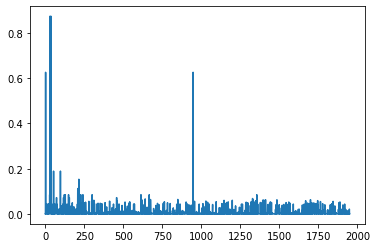

In [105]:
plt.plot(Pt)

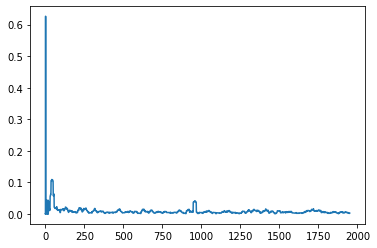

In [106]:
plt.plot([moyk(Pt, i, 20) for i in range(len(Pt))])

In [60]:
# prédiction
def predict(B, W, N):
    P = []
    # calcul diviseur
    div = 0
    for b in B:
        for b2 in B:
            if b2 != b:
                div += W[b][b2]/N[b][b2]
    # proba
    for b in B:
        s = 0
        for b2 in B:
            if b2 != b:
                s += W[b][b2]/N[b][b2]
        P.append(s/div)
    return P

def read(B, b):
    P = []
    teta = []
    for a in B:
        teta.append(b.teta[a])
    # calcul diviseur
    div = sum([np.exp(t) for t in teta])
    # proba
    P = [np.exp(t)/div for t in teta]
    return P

def diff(P1, P2):
    s = 0
    for i in range(len(P1)):
        s += np.square(P1[i] - P2[i])
    return s/len(P1)

In [17]:
algoRdm.At

[[11, 10, 2],
 [9, 7, 1],
 [14, 9, 0],
 [11, 9, 0],
 [6, 3, 2],
 [14, 13, 5],
 [12, 11, 5],
 [11, 8, 5],
 [10, 4, 2],
 [14, 11, 10],
 [11, 8, 0],
 [13, 8, 4],
 [7, 6, 3],
 [12, 9, 5],
 [8, 6, 0],
 [11, 10, 3],
 [12, 10, 1],
 [3, 2, 1],
 [10, 5, 3],
 [11, 3, 2],
 [12, 4, 2],
 [7, 3, 0],
 [10, 3, 1],
 [6, 5, 1],
 [13, 9, 1],
 [12, 11, 8],
 [13, 8, 2],
 [14, 12, 5],
 [14, 9, 8],
 [4, 2, 0],
 [13, 10, 3],
 [13, 7, 3],
 [14, 12, 6],
 [12, 8, 5],
 [11, 9, 6],
 [10, 7, 4],
 [11, 1, 0],
 [13, 5, 1],
 [5, 1, 0],
 [13, 9, 2],
 [8, 7, 5],
 [4, 3, 1],
 [11, 10, 4],
 [9, 8, 2],
 [13, 7, 1],
 [8, 3, 1],
 [11, 5, 1],
 [12, 9, 6],
 [7, 3, 1],
 [10, 9, 0],
 [12, 7, 6],
 [11, 5, 2],
 [7, 1, 0],
 [13, 5, 0],
 [14, 2, 1],
 [12, 11, 9],
 [14, 12, 11],
 [5, 4, 1],
 [11, 10, 6],
 [14, 2, 1],
 [11, 6, 0],
 [8, 1, 0],
 [8, 5, 4],
 [14, 5, 0],
 [9, 2, 1],
 [10, 4, 3],
 [10, 9, 6],
 [10, 9, 8],
 [14, 13, 7],
 [10, 8, 6],
 [11, 7, 0],
 [13, 8, 4],
 [13, 11, 4],
 [13, 8, 4],
 [13, 5, 3],
 [12, 7, 3],
 [12, 4, 1],
